In [2]:
%config Completer.use_jedi = False
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sb


df = pd.read_csv("data_3.csv")

kf = StratifiedKFold(n_splits=10)

data = np.array(df.iloc[:,0:28])
classes = np.array(df['result'])

fold = 0
train_acc = 0
test_acc = 0
    
for train, test in kf.split(data,classes):
    fold+=1
    print(f"Fold #{fold}")
    data_train =  data[train]
    data_test = data[test]
    train_labels1 = classes[train]
    test_labels1 = classes[test]

    
    train_labels = pd.get_dummies(train_labels1, prefix="result")
    test_labels = pd.get_dummies(test_labels1, prefix="result")
    
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,1)),
        keras.layers.Dense(28,activation='sigmoid'),
        keras.layers.Dense(28,activation='sigmoid'),
        keras.layers.Dense(3,activation='sigmoid')
        ])
    
    learning_rate = 0.001
    opt = optimizers.Adam(learning_rate)
    
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"] )
    with tf.device('/CPU:0'):    
        history = model.fit(data_train,train_labels,batch_size = 221, epochs=200, validation_data = (data_test, test_labels))
    
    print("\nTrain split:")
    train_loss, train_accuracy = model.evaluate(data_train, train_labels, verbose= 1)
    print("Accuracy : {}".format(train_accuracy))
    
    print("\nTest split:")
    test_loss, test_accuracy = model.evaluate(data_test, test_labels, verbose= 2)
    print("Accuracy : {}".format(test_accuracy))
    

    train_acc = train_acc + train_accuracy
    test_acc = test_acc + test_accuracy


print("\nThe final train accuracy is:{} ".format(train_acc/10))
print("\nThe final test accuracy is:{} ".format(test_acc/10))

Fold #1
Epoch 1/200
89/89 [==============================] - 0s 2ms/step - loss: 1.0847 - accuracy: 0.4038 - val_loss: 1.0586 - val_accuracy: 0.4598
Epoch 2/200
89/89 [==============================] - 0s 964us/step - loss: 1.0485 - accuracy: 0.4600 - val_loss: 1.0396 - val_accuracy: 0.4598
Epoch 3/200
89/89 [==============================] - 0s 787us/step - loss: 1.0273 - accuracy: 0.4922 - val_loss: 1.0184 - val_accuracy: 0.5177
Epoch 4/200
89/89 [==============================] - 0s 800us/step - loss: 1.0098 - accuracy: 0.5072 - val_loss: 1.0079 - val_accuracy: 0.5034
Epoch 5/200
89/89 [==============================] - 0s 788us/step - loss: 0.9993 - accuracy: 0.5098 - val_loss: 0.9994 - val_accuracy: 0.5099
Epoch 6/200
89/89 [==============================] - 0s 832us/step - loss: 0.9944 - accuracy: 0.5147 - val_loss: 0.9917 - val_accuracy: 0.5278
Epoch 7/200
89/89 [==============================] - 0s 799us/step - loss: 0.9908 - accuracy: 0.5163 - val_loss: 0.9917 - val_accuracy: 

Epoch 58/200
89/89 [==============================] - 0s 804us/step - loss: 0.9759 - accuracy: 0.5280 - val_loss: 0.9809 - val_accuracy: 0.5370
Epoch 59/200
89/89 [==============================] - 0s 794us/step - loss: 0.9757 - accuracy: 0.5282 - val_loss: 0.9799 - val_accuracy: 0.5356
Epoch 60/200
89/89 [==============================] - 0s 802us/step - loss: 0.9754 - accuracy: 0.5285 - val_loss: 0.9833 - val_accuracy: 0.5305
Epoch 61/200
89/89 [==============================] - 0s 782us/step - loss: 0.9748 - accuracy: 0.5296 - val_loss: 0.9823 - val_accuracy: 0.5365
Epoch 62/200
89/89 [==============================] - 0s 794us/step - loss: 0.9755 - accuracy: 0.5262 - val_loss: 0.9843 - val_accuracy: 0.5319
Epoch 63/200
89/89 [==============================] - 0s 801us/step - loss: 0.9752 - accuracy: 0.5283 - val_loss: 0.9825 - val_accuracy: 0.5361
Epoch 64/200
89/89 [==============================] - 0s 783us/step - loss: 0.9768 - accuracy: 0.5260 - val_loss: 0.9832 - val_accuracy:

Epoch 115/200
89/89 [==============================] - 0s 805us/step - loss: 0.9736 - accuracy: 0.5281 - val_loss: 0.9820 - val_accuracy: 0.5287
Epoch 116/200
89/89 [==============================] - 0s 832us/step - loss: 0.9739 - accuracy: 0.5290 - val_loss: 0.9811 - val_accuracy: 0.5356
Epoch 117/200
89/89 [==============================] - 0s 798us/step - loss: 0.9740 - accuracy: 0.5290 - val_loss: 0.9815 - val_accuracy: 0.5310
Epoch 118/200
89/89 [==============================] - 0s 810us/step - loss: 0.9741 - accuracy: 0.5269 - val_loss: 0.9833 - val_accuracy: 0.5333
Epoch 119/200
89/89 [==============================] - 0s 796us/step - loss: 0.9744 - accuracy: 0.5284 - val_loss: 0.9818 - val_accuracy: 0.5356
Epoch 120/200
89/89 [==============================] - 0s 787us/step - loss: 0.9738 - accuracy: 0.5273 - val_loss: 0.9858 - val_accuracy: 0.5214
Epoch 121/200
89/89 [==============================] - 0s 798us/step - loss: 0.9739 - accuracy: 0.5288 - val_loss: 0.9808 - val_ac

89/89 [==============================] - 0s 805us/step - loss: 0.9729 - accuracy: 0.5287 - val_loss: 0.9824 - val_accuracy: 0.5269
Epoch 172/200
89/89 [==============================] - 0s 810us/step - loss: 0.9734 - accuracy: 0.5290 - val_loss: 0.9824 - val_accuracy: 0.5347
Epoch 173/200
89/89 [==============================] - 0s 821us/step - loss: 0.9730 - accuracy: 0.5293 - val_loss: 0.9805 - val_accuracy: 0.5319
Epoch 174/200
89/89 [==============================] - 0s 810us/step - loss: 0.9724 - accuracy: 0.5294 - val_loss: 0.9813 - val_accuracy: 0.5292
Epoch 175/200
89/89 [==============================] - 0s 807us/step - loss: 0.9736 - accuracy: 0.5294 - val_loss: 0.9815 - val_accuracy: 0.5315
Epoch 176/200
89/89 [==============================] - 0s 794us/step - loss: 0.9726 - accuracy: 0.5290 - val_loss: 0.9832 - val_accuracy: 0.5310
Epoch 177/200
89/89 [==============================] - 0s 801us/step - loss: 0.9726 - accuracy: 0.5285 - val_loss: 0.9813 - val_accuracy: 0.5310

89/89 [==============================] - 0s 808us/step - loss: 0.9782 - accuracy: 0.5278 - val_loss: 0.9777 - val_accuracy: 0.5317
Epoch 27/200
89/89 [==============================] - 0s 805us/step - loss: 0.9775 - accuracy: 0.5290 - val_loss: 0.9785 - val_accuracy: 0.5303
Epoch 28/200
89/89 [==============================] - 0s 790us/step - loss: 0.9773 - accuracy: 0.5298 - val_loss: 0.9800 - val_accuracy: 0.5257
Epoch 29/200
89/89 [==============================] - 0s 794us/step - loss: 0.9786 - accuracy: 0.5277 - val_loss: 0.9888 - val_accuracy: 0.5207
Epoch 30/200
89/89 [==============================] - 0s 798us/step - loss: 0.9802 - accuracy: 0.5243 - val_loss: 0.9807 - val_accuracy: 0.5276
Epoch 31/200
89/89 [==============================] - 0s 832us/step - loss: 0.9779 - accuracy: 0.5286 - val_loss: 0.9786 - val_accuracy: 0.5326
Epoch 32/200
89/89 [==============================] - 0s 799us/step - loss: 0.9782 - accuracy: 0.5285 - val_loss: 0.9824 - val_accuracy: 0.5271
Epoch

Epoch 83/200
89/89 [==============================] - 0s 832us/step - loss: 0.9742 - accuracy: 0.5321 - val_loss: 0.9798 - val_accuracy: 0.5267
Epoch 84/200
89/89 [==============================] - 0s 810us/step - loss: 0.9748 - accuracy: 0.5308 - val_loss: 0.9818 - val_accuracy: 0.5326
Epoch 85/200
89/89 [==============================] - 0s 798us/step - loss: 0.9760 - accuracy: 0.5269 - val_loss: 0.9865 - val_accuracy: 0.5303
Epoch 86/200
89/89 [==============================] - 0s 778us/step - loss: 0.9743 - accuracy: 0.5306 - val_loss: 0.9841 - val_accuracy: 0.5317
Epoch 87/200
89/89 [==============================] - 0s 824us/step - loss: 0.9749 - accuracy: 0.5300 - val_loss: 0.9801 - val_accuracy: 0.5303
Epoch 88/200
89/89 [==============================] - 0s 817us/step - loss: 0.9744 - accuracy: 0.5313 - val_loss: 0.9789 - val_accuracy: 0.5290
Epoch 89/200
89/89 [==============================] - 0s 846us/step - loss: 0.9740 - accuracy: 0.5299 - val_loss: 0.9807 - val_accuracy:

89/89 [==============================] - 0s 793us/step - loss: 0.9738 - accuracy: 0.5309 - val_loss: 0.9854 - val_accuracy: 0.5326
Epoch 140/200
89/89 [==============================] - 0s 810us/step - loss: 0.9729 - accuracy: 0.5288 - val_loss: 0.9800 - val_accuracy: 0.5358
Epoch 141/200
89/89 [==============================] - 0s 786us/step - loss: 0.9734 - accuracy: 0.5313 - val_loss: 0.9809 - val_accuracy: 0.5331
Epoch 142/200
89/89 [==============================] - 0s 816us/step - loss: 0.9733 - accuracy: 0.5297 - val_loss: 0.9801 - val_accuracy: 0.5303
Epoch 143/200
89/89 [==============================] - 0s 869us/step - loss: 0.9734 - accuracy: 0.5292 - val_loss: 0.9802 - val_accuracy: 0.5303
Epoch 144/200
89/89 [==============================] - 0s 858us/step - loss: 0.9726 - accuracy: 0.5289 - val_loss: 0.9806 - val_accuracy: 0.5322
Epoch 145/200
89/89 [==============================] - 0s 821us/step - loss: 0.9728 - accuracy: 0.5306 - val_loss: 0.9810 - val_accuracy: 0.5377

89/89 [==============================] - 0s 821us/step - loss: 0.9724 - accuracy: 0.5322 - val_loss: 0.9813 - val_accuracy: 0.5340
Epoch 196/200
89/89 [==============================] - 0s 843us/step - loss: 0.9726 - accuracy: 0.5330 - val_loss: 0.9808 - val_accuracy: 0.5363
Epoch 197/200
89/89 [==============================] - 0s 832us/step - loss: 0.9728 - accuracy: 0.5305 - val_loss: 0.9822 - val_accuracy: 0.5322
Epoch 198/200
89/89 [==============================] - 0s 810us/step - loss: 0.9726 - accuracy: 0.5321 - val_loss: 0.9821 - val_accuracy: 0.5326
Epoch 199/200
89/89 [==============================] - 0s 821us/step - loss: 0.9721 - accuracy: 0.5316 - val_loss: 0.9819 - val_accuracy: 0.5326
Epoch 200/200
89/89 [==============================] - 0s 829us/step - loss: 0.9724 - accuracy: 0.5326 - val_loss: 0.9820 - val_accuracy: 0.5326

Train split:
613/613 [==============================] - 0s 354us/step - loss: 0.9723 - accuracy: 0.5299
Accuracy : 0.5298953056335449

Test spl

89/89 [==============================] - 0s 810us/step - loss: 0.9734 - accuracy: 0.5289 - val_loss: 1.0086 - val_accuracy: 0.5142
Epoch 51/200
89/89 [==============================] - 0s 808us/step - loss: 0.9720 - accuracy: 0.5287 - val_loss: 1.0106 - val_accuracy: 0.5129
Epoch 52/200
89/89 [==============================] - 0s 805us/step - loss: 0.9722 - accuracy: 0.5299 - val_loss: 1.0092 - val_accuracy: 0.5179
Epoch 53/200
89/89 [==============================] - 0s 802us/step - loss: 0.9720 - accuracy: 0.5318 - val_loss: 1.0079 - val_accuracy: 0.5198
Epoch 54/200
89/89 [==============================] - 0s 816us/step - loss: 0.9722 - accuracy: 0.5309 - val_loss: 1.0091 - val_accuracy: 0.5165
Epoch 55/200
89/89 [==============================] - 0s 813us/step - loss: 0.9721 - accuracy: 0.5299 - val_loss: 1.0076 - val_accuracy: 0.5193
Epoch 56/200
89/89 [==============================] - 0s 816us/step - loss: 0.9713 - accuracy: 0.5307 - val_loss: 1.0118 - val_accuracy: 0.5124
Epoch

Epoch 107/200
89/89 [==============================] - 0s 798us/step - loss: 0.9701 - accuracy: 0.5301 - val_loss: 1.0084 - val_accuracy: 0.5142
Epoch 108/200
89/89 [==============================] - 0s 821us/step - loss: 0.9701 - accuracy: 0.5300 - val_loss: 1.0077 - val_accuracy: 0.5142
Epoch 109/200
89/89 [==============================] - 0s 810us/step - loss: 0.9699 - accuracy: 0.5335 - val_loss: 1.0066 - val_accuracy: 0.5216
Epoch 110/200
89/89 [==============================] - 0s 794us/step - loss: 0.9701 - accuracy: 0.5334 - val_loss: 1.0064 - val_accuracy: 0.5156
Epoch 111/200
89/89 [==============================] - 0s 824us/step - loss: 0.9686 - accuracy: 0.5336 - val_loss: 1.0096 - val_accuracy: 0.5115
Epoch 112/200
89/89 [==============================] - 0s 805us/step - loss: 0.9701 - accuracy: 0.5321 - val_loss: 1.0097 - val_accuracy: 0.5184
Epoch 113/200
89/89 [==============================] - 0s 791us/step - loss: 0.9706 - accuracy: 0.5305 - val_loss: 1.0103 - val_ac

89/89 [==============================] - 0s 888us/step - loss: 0.9677 - accuracy: 0.5321 - val_loss: 1.0076 - val_accuracy: 0.5161
Epoch 164/200
89/89 [==============================] - 0s 866us/step - loss: 0.9684 - accuracy: 0.5339 - val_loss: 1.0084 - val_accuracy: 0.5110
Epoch 165/200
89/89 [==============================] - 0s 900us/step - loss: 0.9679 - accuracy: 0.5335 - val_loss: 1.0086 - val_accuracy: 0.5142
Epoch 166/200
89/89 [==============================] - 0s 889us/step - loss: 0.9687 - accuracy: 0.5315 - val_loss: 1.0085 - val_accuracy: 0.5119
Epoch 167/200
89/89 [==============================] - 0s 821us/step - loss: 0.9676 - accuracy: 0.5344 - val_loss: 1.0092 - val_accuracy: 0.5069
Epoch 168/200
89/89 [==============================] - 0s 847us/step - loss: 0.9679 - accuracy: 0.5316 - val_loss: 1.0088 - val_accuracy: 0.5133
Epoch 169/200
89/89 [==============================] - 0s 832us/step - loss: 0.9677 - accuracy: 0.5322 - val_loss: 1.0078 - val_accuracy: 0.5124

89/89 [==============================] - 0s 808us/step - loss: 0.9773 - accuracy: 0.5270 - val_loss: 1.0070 - val_accuracy: 0.5092
Epoch 19/200
89/89 [==============================] - 0s 787us/step - loss: 0.9772 - accuracy: 0.5277 - val_loss: 1.0069 - val_accuracy: 0.5000
Epoch 20/200
89/89 [==============================] - 0s 808us/step - loss: 0.9773 - accuracy: 0.5275 - val_loss: 1.0080 - val_accuracy: 0.5028
Epoch 21/200
89/89 [==============================] - 0s 794us/step - loss: 0.9773 - accuracy: 0.5281 - val_loss: 1.0048 - val_accuracy: 0.5083
Epoch 22/200
89/89 [==============================] - 0s 800us/step - loss: 0.9767 - accuracy: 0.5271 - val_loss: 1.0054 - val_accuracy: 0.5087
Epoch 23/200
89/89 [==============================] - 0s 818us/step - loss: 0.9786 - accuracy: 0.5260 - val_loss: 1.0067 - val_accuracy: 0.5101
Epoch 24/200
89/89 [==============================] - 0s 816us/step - loss: 0.9775 - accuracy: 0.5261 - val_loss: 1.0059 - val_accuracy: 0.5005
Epoch

Epoch 75/200
89/89 [==============================] - 0s 847us/step - loss: 0.9741 - accuracy: 0.5316 - val_loss: 1.0071 - val_accuracy: 0.5124
Epoch 76/200
89/89 [==============================] - 0s 832us/step - loss: 0.9726 - accuracy: 0.5311 - val_loss: 1.0062 - val_accuracy: 0.5064
Epoch 77/200
89/89 [==============================] - 0s 853us/step - loss: 0.9714 - accuracy: 0.5327 - val_loss: 1.0052 - val_accuracy: 0.5101
Epoch 78/200
89/89 [==============================] - 0s 869us/step - loss: 0.9713 - accuracy: 0.5316 - val_loss: 1.0068 - val_accuracy: 0.5087
Epoch 79/200
89/89 [==============================] - 0s 900us/step - loss: 0.9723 - accuracy: 0.5321 - val_loss: 1.0064 - val_accuracy: 0.5092
Epoch 80/200
89/89 [==============================] - 0s 866us/step - loss: 0.9718 - accuracy: 0.5344 - val_loss: 1.0040 - val_accuracy: 0.5037
Epoch 81/200
89/89 [==============================] - 0s 821us/step - loss: 0.9717 - accuracy: 0.5331 - val_loss: 1.0041 - val_accuracy:

Epoch 132/200
89/89 [==============================] - 0s 797us/step - loss: 0.9704 - accuracy: 0.5317 - val_loss: 1.0094 - val_accuracy: 0.5069
Epoch 133/200
89/89 [==============================] - 0s 817us/step - loss: 0.9698 - accuracy: 0.5330 - val_loss: 1.0058 - val_accuracy: 0.5087
Epoch 134/200
89/89 [==============================] - 0s 824us/step - loss: 0.9697 - accuracy: 0.5335 - val_loss: 1.0042 - val_accuracy: 0.5124
Epoch 135/200
89/89 [==============================] - 0s 794us/step - loss: 0.9702 - accuracy: 0.5348 - val_loss: 1.0060 - val_accuracy: 0.5115
Epoch 136/200
89/89 [==============================] - 0s 821us/step - loss: 0.9705 - accuracy: 0.5324 - val_loss: 1.0049 - val_accuracy: 0.5069
Epoch 137/200
89/89 [==============================] - 0s 797us/step - loss: 0.9702 - accuracy: 0.5317 - val_loss: 1.0067 - val_accuracy: 0.5051
Epoch 138/200
89/89 [==============================] - 0s 791us/step - loss: 0.9700 - accuracy: 0.5328 - val_loss: 1.0074 - val_ac

89/89 [==============================] - 0s 858us/step - loss: 0.9694 - accuracy: 0.5321 - val_loss: 1.0076 - val_accuracy: 0.5083
Epoch 189/200
89/89 [==============================] - 0s 839us/step - loss: 0.9691 - accuracy: 0.5334 - val_loss: 1.0058 - val_accuracy: 0.5097
Epoch 190/200
89/89 [==============================] - 0s 824us/step - loss: 0.9692 - accuracy: 0.5333 - val_loss: 1.0072 - val_accuracy: 0.5115
Epoch 191/200
89/89 [==============================] - 0s 832us/step - loss: 0.9704 - accuracy: 0.5346 - val_loss: 1.0078 - val_accuracy: 0.5078
Epoch 192/200
89/89 [==============================] - 0s 819us/step - loss: 0.9695 - accuracy: 0.5327 - val_loss: 1.0093 - val_accuracy: 0.5092
Epoch 193/200
89/89 [==============================] - 0s 824us/step - loss: 0.9693 - accuracy: 0.5336 - val_loss: 1.0061 - val_accuracy: 0.5087
Epoch 194/200
89/89 [==============================] - 0s 828us/step - loss: 0.9685 - accuracy: 0.5345 - val_loss: 1.0066 - val_accuracy: 0.5124

89/89 [==============================] - 0s 794us/step - loss: 0.9756 - accuracy: 0.5299 - val_loss: 0.9977 - val_accuracy: 0.5064
Epoch 42/200
89/89 [==============================] - 0s 790us/step - loss: 0.9738 - accuracy: 0.5296 - val_loss: 0.9928 - val_accuracy: 0.5225
Epoch 43/200
89/89 [==============================] - 0s 783us/step - loss: 0.9753 - accuracy: 0.5307 - val_loss: 0.9947 - val_accuracy: 0.5175
Epoch 44/200
89/89 [==============================] - 0s 794us/step - loss: 0.9739 - accuracy: 0.5311 - val_loss: 0.9946 - val_accuracy: 0.5124
Epoch 45/200
89/89 [==============================] - 0s 790us/step - loss: 0.9739 - accuracy: 0.5316 - val_loss: 0.9938 - val_accuracy: 0.5193
Epoch 46/200
89/89 [==============================] - 0s 817us/step - loss: 0.9744 - accuracy: 0.5318 - val_loss: 0.9942 - val_accuracy: 0.5142
Epoch 47/200
89/89 [==============================] - 0s 810us/step - loss: 0.9741 - accuracy: 0.5316 - val_loss: 0.9953 - val_accuracy: 0.5142
Epoch

Epoch 98/200
89/89 [==============================] - 0s 802us/step - loss: 0.9723 - accuracy: 0.5350 - val_loss: 0.9901 - val_accuracy: 0.5221
Epoch 99/200
89/89 [==============================] - 0s 821us/step - loss: 0.9725 - accuracy: 0.5322 - val_loss: 0.9926 - val_accuracy: 0.5184
Epoch 100/200
89/89 [==============================] - 0s 787us/step - loss: 0.9721 - accuracy: 0.5324 - val_loss: 0.9888 - val_accuracy: 0.5267
Epoch 101/200
89/89 [==============================] - 0s 832us/step - loss: 0.9719 - accuracy: 0.5324 - val_loss: 0.9907 - val_accuracy: 0.5248
Epoch 102/200
89/89 [==============================] - 0s 807us/step - loss: 0.9725 - accuracy: 0.5338 - val_loss: 0.9911 - val_accuracy: 0.5216
Epoch 103/200
89/89 [==============================] - 0s 787us/step - loss: 0.9722 - accuracy: 0.5320 - val_loss: 0.9910 - val_accuracy: 0.5198
Epoch 104/200
89/89 [==============================] - 0s 799us/step - loss: 0.9723 - accuracy: 0.5325 - val_loss: 0.9913 - val_accu

89/89 [==============================] - 0s 821us/step - loss: 0.9711 - accuracy: 0.5340 - val_loss: 0.9898 - val_accuracy: 0.5193
Epoch 155/200
89/89 [==============================] - 0s 786us/step - loss: 0.9711 - accuracy: 0.5337 - val_loss: 0.9934 - val_accuracy: 0.5078
Epoch 156/200
89/89 [==============================] - 0s 806us/step - loss: 0.9716 - accuracy: 0.5330 - val_loss: 0.9894 - val_accuracy: 0.5271
Epoch 157/200
89/89 [==============================] - 0s 813us/step - loss: 0.9704 - accuracy: 0.5335 - val_loss: 0.9902 - val_accuracy: 0.5248
Epoch 158/200
89/89 [==============================] - 0s 798us/step - loss: 0.9716 - accuracy: 0.5325 - val_loss: 0.9916 - val_accuracy: 0.5184
Epoch 159/200
89/89 [==============================] - 0s 824us/step - loss: 0.9710 - accuracy: 0.5330 - val_loss: 0.9911 - val_accuracy: 0.5234
Epoch 160/200
89/89 [==============================] - 0s 798us/step - loss: 0.9709 - accuracy: 0.5333 - val_loss: 0.9900 - val_accuracy: 0.5193

89/89 [==============================] - 0s 813us/step - loss: 0.9900 - accuracy: 0.5175 - val_loss: 0.9904 - val_accuracy: 0.5230
Epoch 10/200
89/89 [==============================] - 0s 794us/step - loss: 0.9892 - accuracy: 0.5191 - val_loss: 0.9943 - val_accuracy: 0.5225
Epoch 11/200
89/89 [==============================] - 0s 796us/step - loss: 0.9880 - accuracy: 0.5187 - val_loss: 1.0044 - val_accuracy: 0.5037
Epoch 12/200
89/89 [==============================] - 0s 878us/step - loss: 0.9875 - accuracy: 0.5195 - val_loss: 0.9934 - val_accuracy: 0.5253
Epoch 13/200
89/89 [==============================] - 0s 824us/step - loss: 0.9863 - accuracy: 0.5173 - val_loss: 0.9961 - val_accuracy: 0.5110
Epoch 14/200
89/89 [==============================] - 0s 805us/step - loss: 0.9856 - accuracy: 0.5181 - val_loss: 0.9913 - val_accuracy: 0.5280
Epoch 15/200
89/89 [==============================] - 0s 801us/step - loss: 0.9858 - accuracy: 0.5198 - val_loss: 0.9924 - val_accuracy: 0.5322
Epoch

Epoch 66/200
89/89 [==============================] - 0s 832us/step - loss: 0.9784 - accuracy: 0.5238 - val_loss: 0.9839 - val_accuracy: 0.5326
Epoch 67/200
89/89 [==============================] - 0s 843us/step - loss: 0.9782 - accuracy: 0.5254 - val_loss: 0.9882 - val_accuracy: 0.5225
Epoch 68/200
89/89 [==============================] - 0s 856us/step - loss: 0.9777 - accuracy: 0.5264 - val_loss: 0.9840 - val_accuracy: 0.5317
Epoch 69/200
89/89 [==============================] - 0s 832us/step - loss: 0.9772 - accuracy: 0.5250 - val_loss: 0.9845 - val_accuracy: 0.5308
Epoch 70/200
89/89 [==============================] - 0s 810us/step - loss: 0.9773 - accuracy: 0.5263 - val_loss: 0.9828 - val_accuracy: 0.5294
Epoch 71/200
89/89 [==============================] - 0s 800us/step - loss: 0.9776 - accuracy: 0.5253 - val_loss: 0.9835 - val_accuracy: 0.5271
Epoch 72/200
89/89 [==============================] - 0s 805us/step - loss: 0.9775 - accuracy: 0.5268 - val_loss: 0.9847 - val_accuracy:

Epoch 123/200
89/89 [==============================] - 0s 820us/step - loss: 0.9769 - accuracy: 0.5270 - val_loss: 0.9802 - val_accuracy: 0.5368
Epoch 124/200
89/89 [==============================] - 0s 798us/step - loss: 0.9759 - accuracy: 0.5270 - val_loss: 0.9806 - val_accuracy: 0.5354
Epoch 125/200
89/89 [==============================] - 0s 794us/step - loss: 0.9760 - accuracy: 0.5276 - val_loss: 0.9809 - val_accuracy: 0.5372
Epoch 126/200
89/89 [==============================] - 0s 802us/step - loss: 0.9750 - accuracy: 0.5279 - val_loss: 0.9799 - val_accuracy: 0.5326
Epoch 127/200
89/89 [==============================] - 0s 805us/step - loss: 0.9750 - accuracy: 0.5275 - val_loss: 0.9836 - val_accuracy: 0.5267
Epoch 128/200
89/89 [==============================] - 0s 801us/step - loss: 0.9764 - accuracy: 0.5282 - val_loss: 0.9811 - val_accuracy: 0.5391
Epoch 129/200
89/89 [==============================] - 0s 794us/step - loss: 0.9767 - accuracy: 0.5270 - val_loss: 0.9822 - val_ac

89/89 [==============================] - 0s 809us/step - loss: 0.9749 - accuracy: 0.5272 - val_loss: 0.9815 - val_accuracy: 0.5285
Epoch 180/200
89/89 [==============================] - 0s 798us/step - loss: 0.9742 - accuracy: 0.5274 - val_loss: 0.9819 - val_accuracy: 0.5372
Epoch 181/200
89/89 [==============================] - 0s 797us/step - loss: 0.9738 - accuracy: 0.5269 - val_loss: 0.9829 - val_accuracy: 0.5303
Epoch 182/200
89/89 [==============================] - 0s 805us/step - loss: 0.9751 - accuracy: 0.5275 - val_loss: 0.9851 - val_accuracy: 0.5303
Epoch 183/200
89/89 [==============================] - 0s 802us/step - loss: 0.9754 - accuracy: 0.5258 - val_loss: 0.9824 - val_accuracy: 0.5317
Epoch 184/200
89/89 [==============================] - 0s 805us/step - loss: 0.9752 - accuracy: 0.5280 - val_loss: 0.9836 - val_accuracy: 0.5294
Epoch 185/200
89/89 [==============================] - 0s 798us/step - loss: 0.9749 - accuracy: 0.5281 - val_loss: 0.9830 - val_accuracy: 0.5271

89/89 [==============================] - 0s 833us/step - loss: 0.9777 - accuracy: 0.5262 - val_loss: 0.9686 - val_accuracy: 0.5381
Epoch 35/200
89/89 [==============================] - 0s 843us/step - loss: 0.9797 - accuracy: 0.5265 - val_loss: 0.9661 - val_accuracy: 0.5372
Epoch 36/200
89/89 [==============================] - 0s 823us/step - loss: 0.9784 - accuracy: 0.5268 - val_loss: 0.9679 - val_accuracy: 0.5322
Epoch 37/200
89/89 [==============================] - 0s 791us/step - loss: 0.9773 - accuracy: 0.5271 - val_loss: 0.9711 - val_accuracy: 0.5312
Epoch 38/200
89/89 [==============================] - 0s 783us/step - loss: 0.9789 - accuracy: 0.5272 - val_loss: 0.9678 - val_accuracy: 0.5358
Epoch 39/200
89/89 [==============================] - 0s 866us/step - loss: 0.9772 - accuracy: 0.5259 - val_loss: 0.9718 - val_accuracy: 0.5372
Epoch 40/200
89/89 [==============================] - 0s 801us/step - loss: 0.9786 - accuracy: 0.5249 - val_loss: 0.9685 - val_accuracy: 0.5290
Epoch

Epoch 91/200
89/89 [==============================] - 0s 824us/step - loss: 0.9748 - accuracy: 0.5291 - val_loss: 0.9696 - val_accuracy: 0.5386
Epoch 92/200
89/89 [==============================] - 0s 794us/step - loss: 0.9744 - accuracy: 0.5291 - val_loss: 0.9667 - val_accuracy: 0.5317
Epoch 93/200
89/89 [==============================] - 0s 787us/step - loss: 0.9746 - accuracy: 0.5288 - val_loss: 0.9675 - val_accuracy: 0.5404
Epoch 94/200
89/89 [==============================] - 0s 786us/step - loss: 0.9743 - accuracy: 0.5291 - val_loss: 0.9670 - val_accuracy: 0.5363
Epoch 95/200
89/89 [==============================] - 0s 783us/step - loss: 0.9746 - accuracy: 0.5281 - val_loss: 0.9681 - val_accuracy: 0.5377
Epoch 96/200
89/89 [==============================] - 0s 787us/step - loss: 0.9745 - accuracy: 0.5292 - val_loss: 0.9656 - val_accuracy: 0.5363
Epoch 97/200
89/89 [==============================] - 0s 797us/step - loss: 0.9752 - accuracy: 0.5295 - val_loss: 0.9673 - val_accuracy:

89/89 [==============================] - 0s 817us/step - loss: 0.9737 - accuracy: 0.5296 - val_loss: 0.9651 - val_accuracy: 0.5358
Epoch 148/200
89/89 [==============================] - 0s 790us/step - loss: 0.9743 - accuracy: 0.5288 - val_loss: 0.9672 - val_accuracy: 0.5386
Epoch 149/200
89/89 [==============================] - 0s 783us/step - loss: 0.9736 - accuracy: 0.5301 - val_loss: 0.9662 - val_accuracy: 0.5391
Epoch 150/200
89/89 [==============================] - 0s 783us/step - loss: 0.9734 - accuracy: 0.5302 - val_loss: 0.9701 - val_accuracy: 0.5345
Epoch 151/200
89/89 [==============================] - 0s 779us/step - loss: 0.9735 - accuracy: 0.5305 - val_loss: 0.9679 - val_accuracy: 0.5331
Epoch 152/200
89/89 [==============================] - 0s 783us/step - loss: 0.9732 - accuracy: 0.5313 - val_loss: 0.9673 - val_accuracy: 0.5354
Epoch 153/200
89/89 [==============================] - 0s 783us/step - loss: 0.9743 - accuracy: 0.5276 - val_loss: 0.9690 - val_accuracy: 0.5381

89/89 [==============================] - 0s 969us/step - loss: 1.0462 - accuracy: 0.4600 - val_loss: 1.0248 - val_accuracy: 0.4600
Epoch 3/200
89/89 [==============================] - 0s 808us/step - loss: 1.0233 - accuracy: 0.5000 - val_loss: 0.9881 - val_accuracy: 0.5386
Epoch 4/200
89/89 [==============================] - 0s 817us/step - loss: 1.0053 - accuracy: 0.5150 - val_loss: 0.9746 - val_accuracy: 0.5326
Epoch 5/200
89/89 [==============================] - 0s 818us/step - loss: 0.9987 - accuracy: 0.5171 - val_loss: 0.9628 - val_accuracy: 0.5377
Epoch 6/200
89/89 [==============================] - 0s 798us/step - loss: 0.9955 - accuracy: 0.5146 - val_loss: 0.9600 - val_accuracy: 0.5391
Epoch 7/200
89/89 [==============================] - 0s 798us/step - loss: 0.9943 - accuracy: 0.5178 - val_loss: 0.9598 - val_accuracy: 0.5358
Epoch 8/200
89/89 [==============================] - 0s 810us/step - loss: 0.9934 - accuracy: 0.5183 - val_loss: 0.9572 - val_accuracy: 0.5368
Epoch 9/200

89/89 [==============================] - 0s 808us/step - loss: 0.9815 - accuracy: 0.5265 - val_loss: 0.9461 - val_accuracy: 0.5404
Epoch 60/200
89/89 [==============================] - 0s 843us/step - loss: 0.9808 - accuracy: 0.5266 - val_loss: 0.9555 - val_accuracy: 0.5372
Epoch 61/200
89/89 [==============================] - 0s 808us/step - loss: 0.9807 - accuracy: 0.5273 - val_loss: 0.9494 - val_accuracy: 0.5409
Epoch 62/200
89/89 [==============================] - 0s 798us/step - loss: 0.9804 - accuracy: 0.5268 - val_loss: 0.9488 - val_accuracy: 0.5414
Epoch 63/200
89/89 [==============================] - 0s 798us/step - loss: 0.9810 - accuracy: 0.5258 - val_loss: 0.9490 - val_accuracy: 0.5450
Epoch 64/200
89/89 [==============================] - 0s 810us/step - loss: 0.9803 - accuracy: 0.5296 - val_loss: 0.9482 - val_accuracy: 0.5372
Epoch 65/200
89/89 [==============================] - 0s 821us/step - loss: 0.9797 - accuracy: 0.5295 - val_loss: 0.9465 - val_accuracy: 0.5418
Epoch

Epoch 116/200
89/89 [==============================] - 0s 801us/step - loss: 0.9784 - accuracy: 0.5275 - val_loss: 0.9504 - val_accuracy: 0.5464
Epoch 117/200
89/89 [==============================] - 0s 810us/step - loss: 0.9792 - accuracy: 0.5292 - val_loss: 0.9499 - val_accuracy: 0.5446
Epoch 118/200
89/89 [==============================] - 0s 810us/step - loss: 0.9779 - accuracy: 0.5283 - val_loss: 0.9497 - val_accuracy: 0.5432
Epoch 119/200
89/89 [==============================] - 0s 833us/step - loss: 0.9771 - accuracy: 0.5296 - val_loss: 0.9522 - val_accuracy: 0.5478
Epoch 120/200
89/89 [==============================] - 0s 821us/step - loss: 0.9791 - accuracy: 0.5297 - val_loss: 0.9519 - val_accuracy: 0.5427
Epoch 121/200
89/89 [==============================] - 0s 798us/step - loss: 0.9773 - accuracy: 0.5299 - val_loss: 0.9511 - val_accuracy: 0.5446
Epoch 122/200
89/89 [==============================] - 0s 804us/step - loss: 0.9781 - accuracy: 0.5287 - val_loss: 0.9459 - val_ac

89/89 [==============================] - 0s 797us/step - loss: 0.9767 - accuracy: 0.5293 - val_loss: 0.9513 - val_accuracy: 0.5386
Epoch 173/200
89/89 [==============================] - 0s 806us/step - loss: 0.9775 - accuracy: 0.5287 - val_loss: 0.9559 - val_accuracy: 0.5386
Epoch 174/200
89/89 [==============================] - 0s 812us/step - loss: 0.9771 - accuracy: 0.5299 - val_loss: 0.9541 - val_accuracy: 0.5441
Epoch 175/200
89/89 [==============================] - 0s 805us/step - loss: 0.9774 - accuracy: 0.5305 - val_loss: 0.9559 - val_accuracy: 0.5441
Epoch 176/200
89/89 [==============================] - 0s 824us/step - loss: 0.9766 - accuracy: 0.5307 - val_loss: 0.9480 - val_accuracy: 0.5414
Epoch 177/200
89/89 [==============================] - 0s 805us/step - loss: 0.9770 - accuracy: 0.5292 - val_loss: 0.9522 - val_accuracy: 0.5427
Epoch 178/200
89/89 [==============================] - 0s 824us/step - loss: 0.9765 - accuracy: 0.5302 - val_loss: 0.9510 - val_accuracy: 0.5441

89/89 [==============================] - 0s 810us/step - loss: 0.9839 - accuracy: 0.5249 - val_loss: 0.9859 - val_accuracy: 0.5152
Epoch 28/200
89/89 [==============================] - 0s 799us/step - loss: 0.9833 - accuracy: 0.5235 - val_loss: 0.9859 - val_accuracy: 0.5156
Epoch 29/200
89/89 [==============================] - 0s 821us/step - loss: 0.9837 - accuracy: 0.5248 - val_loss: 0.9876 - val_accuracy: 0.5165
Epoch 30/200
89/89 [==============================] - 0s 821us/step - loss: 0.9846 - accuracy: 0.5241 - val_loss: 0.9838 - val_accuracy: 0.5198
Epoch 31/200
89/89 [==============================] - 0s 798us/step - loss: 0.9826 - accuracy: 0.5242 - val_loss: 0.9815 - val_accuracy: 0.5188
Epoch 32/200
89/89 [==============================] - 0s 810us/step - loss: 0.9829 - accuracy: 0.5253 - val_loss: 0.9853 - val_accuracy: 0.5193
Epoch 33/200
89/89 [==============================] - 0s 810us/step - loss: 0.9835 - accuracy: 0.5232 - val_loss: 0.9864 - val_accuracy: 0.5161
Epoch

Epoch 84/200
89/89 [==============================] - 0s 810us/step - loss: 0.9794 - accuracy: 0.5297 - val_loss: 0.9776 - val_accuracy: 0.5239
Epoch 85/200
89/89 [==============================] - 0s 810us/step - loss: 0.9787 - accuracy: 0.5302 - val_loss: 0.9805 - val_accuracy: 0.5257
Epoch 86/200
89/89 [==============================] - 0s 810us/step - loss: 0.9778 - accuracy: 0.5297 - val_loss: 0.9790 - val_accuracy: 0.5244
Epoch 87/200
89/89 [==============================] - 0s 810us/step - loss: 0.9782 - accuracy: 0.5296 - val_loss: 0.9794 - val_accuracy: 0.5239
Epoch 88/200
89/89 [==============================] - 0s 866us/step - loss: 0.9780 - accuracy: 0.5296 - val_loss: 0.9773 - val_accuracy: 0.5257
Epoch 89/200
89/89 [==============================] - 0s 866us/step - loss: 0.9781 - accuracy: 0.5289 - val_loss: 0.9791 - val_accuracy: 0.5188
Epoch 90/200
89/89 [==============================] - 0s 866us/step - loss: 0.9779 - accuracy: 0.5292 - val_loss: 0.9853 - val_accuracy:

89/89 [==============================] - 0s 787us/step - loss: 0.9772 - accuracy: 0.5307 - val_loss: 0.9778 - val_accuracy: 0.5253
Epoch 141/200
89/89 [==============================] - 0s 808us/step - loss: 0.9771 - accuracy: 0.5317 - val_loss: 0.9773 - val_accuracy: 0.5234
Epoch 142/200
89/89 [==============================] - 0s 794us/step - loss: 0.9790 - accuracy: 0.5308 - val_loss: 0.9797 - val_accuracy: 0.5234
Epoch 143/200
89/89 [==============================] - 0s 790us/step - loss: 0.9766 - accuracy: 0.5319 - val_loss: 0.9816 - val_accuracy: 0.5262
Epoch 144/200
89/89 [==============================] - 0s 794us/step - loss: 0.9780 - accuracy: 0.5307 - val_loss: 0.9774 - val_accuracy: 0.5267
Epoch 145/200
89/89 [==============================] - 0s 782us/step - loss: 0.9774 - accuracy: 0.5315 - val_loss: 0.9786 - val_accuracy: 0.5225
Epoch 146/200
89/89 [==============================] - 0s 802us/step - loss: 0.9774 - accuracy: 0.5315 - val_loss: 0.9802 - val_accuracy: 0.5244

89/89 [==============================] - 0s 816us/step - loss: 0.9753 - accuracy: 0.5322 - val_loss: 0.9776 - val_accuracy: 0.5267
Epoch 197/200
89/89 [==============================] - 0s 813us/step - loss: 0.9759 - accuracy: 0.5305 - val_loss: 0.9807 - val_accuracy: 0.5262
Epoch 198/200
89/89 [==============================] - 0s 794us/step - loss: 0.9755 - accuracy: 0.5322 - val_loss: 0.9808 - val_accuracy: 0.5239
Epoch 199/200
89/89 [==============================] - 0s 790us/step - loss: 0.9759 - accuracy: 0.5320 - val_loss: 0.9792 - val_accuracy: 0.5257
Epoch 200/200
89/89 [==============================] - 0s 794us/step - loss: 0.9765 - accuracy: 0.5302 - val_loss: 0.9817 - val_accuracy: 0.5262

Train split:
613/613 [==============================] - 0s 359us/step - loss: 0.9750 - accuracy: 0.5327
Accuracy : 0.5326525568962097

Test split:
68/68 - 0s - loss: 0.9817 - accuracy: 0.5262
Accuracy : 0.5261948704719543
Fold #10
Epoch 1/200
89/89 [==============================] - 0s 2

89/89 [==============================] - 0s 797us/step - loss: 0.9924 - accuracy: 0.5241 - val_loss: 0.9828 - val_accuracy: 0.5299
Epoch 52/200
89/89 [==============================] - 0s 794us/step - loss: 0.9924 - accuracy: 0.5219 - val_loss: 0.9802 - val_accuracy: 0.5303
Epoch 53/200
89/89 [==============================] - 0s 801us/step - loss: 0.9921 - accuracy: 0.5221 - val_loss: 0.9953 - val_accuracy: 0.5280
Epoch 54/200
89/89 [==============================] - 0s 806us/step - loss: 0.9924 - accuracy: 0.5232 - val_loss: 0.9817 - val_accuracy: 0.5294
Epoch 55/200
89/89 [==============================] - 0s 794us/step - loss: 0.9911 - accuracy: 0.5225 - val_loss: 0.9780 - val_accuracy: 0.5303
Epoch 56/200
89/89 [==============================] - 0s 790us/step - loss: 0.9916 - accuracy: 0.5230 - val_loss: 0.9775 - val_accuracy: 0.5308
Epoch 57/200
89/89 [==============================] - 0s 806us/step - loss: 0.9917 - accuracy: 0.5235 - val_loss: 0.9855 - val_accuracy: 0.5285
Epoch

Epoch 108/200
89/89 [==============================] - 0s 794us/step - loss: 0.9885 - accuracy: 0.5279 - val_loss: 0.9763 - val_accuracy: 0.5363
Epoch 109/200
89/89 [==============================] - 0s 802us/step - loss: 0.9884 - accuracy: 0.5288 - val_loss: 0.9739 - val_accuracy: 0.5322
Epoch 110/200
89/89 [==============================] - 0s 805us/step - loss: 0.9892 - accuracy: 0.5256 - val_loss: 0.9800 - val_accuracy: 0.5340
Epoch 111/200
89/89 [==============================] - 0s 798us/step - loss: 0.9892 - accuracy: 0.5284 - val_loss: 0.9813 - val_accuracy: 0.5345
Epoch 112/200
89/89 [==============================] - 0s 804us/step - loss: 0.9878 - accuracy: 0.5299 - val_loss: 0.9742 - val_accuracy: 0.5312
Epoch 113/200
89/89 [==============================] - 0s 809us/step - loss: 0.9892 - accuracy: 0.5262 - val_loss: 0.9779 - val_accuracy: 0.5326
Epoch 114/200
89/89 [==============================] - 0s 802us/step - loss: 0.9885 - accuracy: 0.5285 - val_loss: 0.9746 - val_ac

89/89 [==============================] - 0s 794us/step - loss: 0.9866 - accuracy: 0.5308 - val_loss: 0.9743 - val_accuracy: 0.5349
Epoch 165/200
89/89 [==============================] - 0s 801us/step - loss: 0.9864 - accuracy: 0.5299 - val_loss: 0.9742 - val_accuracy: 0.5326
Epoch 166/200
89/89 [==============================] - 0s 783us/step - loss: 0.9860 - accuracy: 0.5299 - val_loss: 0.9731 - val_accuracy: 0.5317
Epoch 167/200
89/89 [==============================] - 0s 810us/step - loss: 0.9857 - accuracy: 0.5323 - val_loss: 0.9719 - val_accuracy: 0.5335
Epoch 168/200
89/89 [==============================] - 0s 797us/step - loss: 0.9868 - accuracy: 0.5292 - val_loss: 0.9730 - val_accuracy: 0.5345
Epoch 169/200
89/89 [==============================] - 0s 783us/step - loss: 0.9868 - accuracy: 0.5299 - val_loss: 0.9758 - val_accuracy: 0.5335
Epoch 170/200
89/89 [==============================] - 0s 790us/step - loss: 0.9858 - accuracy: 0.5299 - val_loss: 0.9737 - val_accuracy: 0.5340

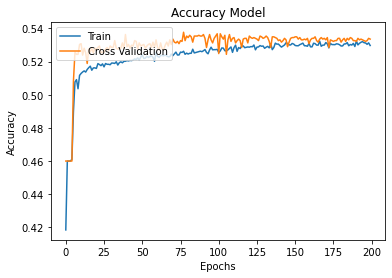

In [3]:
#See how the training went
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Cross Validation'], loc = 'upper left')
plt.show()

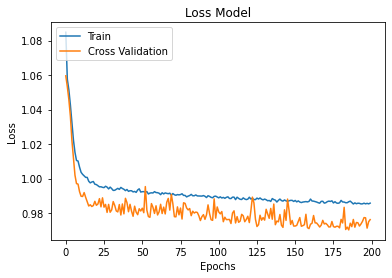

In [4]:
#See how the loss function went 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Cross Validation'], loc = "upper left")
plt.show()

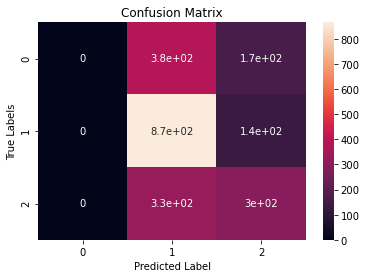

In [5]:
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
predict_results = model.predict(data_test)

predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(test_labels1, predict_results)
sb.heatmap(cm, annot = True, ax = ax);
ax.set_xlabel('Predicted Label');
ax.set_ylabel("True Labels");
ax.set_title("Confusion Matrix");